In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')
df.head()



,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,12/31/2023,Basic,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,12/31/2023,Basic,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,12/31/2023,Basic,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,12/31/2023,Basic,0,0


(0.0, 30.0)

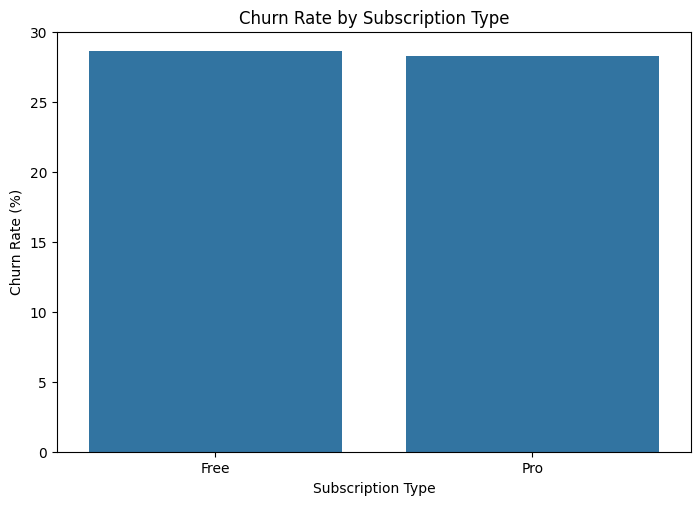

In [7]:
# Set up the dashboard layout
plt.figure(figsize=(18, 12))

# Chart 1: Churn Rate by Subscription Type
plt.subplot(2, 2, 1)
sns.barplot(x='subscription_type', y='churned', data=df, estimator=lambda x: sum(x) / len(x) * 100, errorbar=None)
plt.title('Churn Rate by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 30)



(0.0, 20.0)

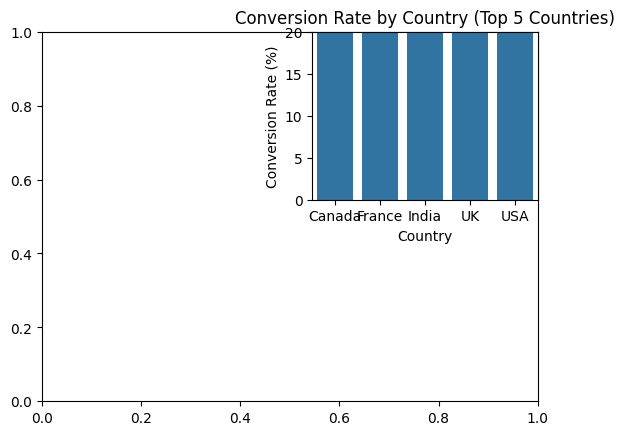

In [8]:
# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Chart 2: Conversion Rate by Country (Top 5 Countries)
top_countries = df['country'].value_counts().nlargest(5).index
conversion_rate_by_country = df[df['country'].isin(top_countries)].groupby('country')['subscription_type'].apply(lambda x: (x == 'Pro').mean() * 100)

plt.subplot(2, 2, 2)
sns.barplot(x=conversion_rate_by_country.index, y=conversion_rate_by_country.values)
plt.title('Conversion Rate by Country (Top 5 Countries)')
plt.xlabel('Country')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, 20)



Text(0, 0.5, 'Monthly Revenue ($)')

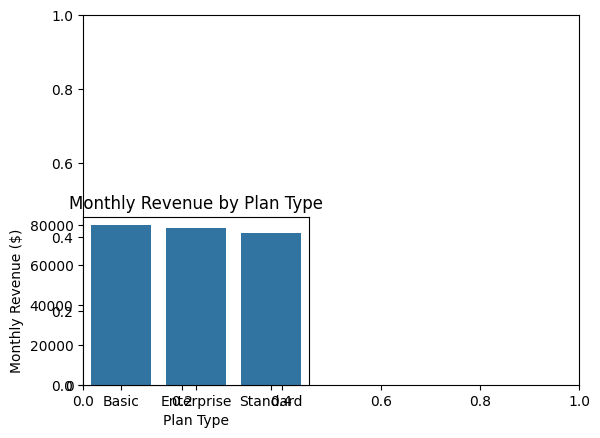

In [4]:
# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Chart 3: Monthly Revenue by Plan Type
revenue_by_plan = df[df['subscription_type'] == 'Pro'].groupby('plan_type')['monthly_revenue'].sum()

plt.subplot(2, 2, 3)
sns.barplot(x=revenue_by_plan.index, y=revenue_by_plan.values)
plt.title('Monthly Revenue by Plan Type')
plt.xlabel('Plan Type')
plt.ylabel('Monthly Revenue ($)')



Text(0, 0.5, 'Total Sessions')

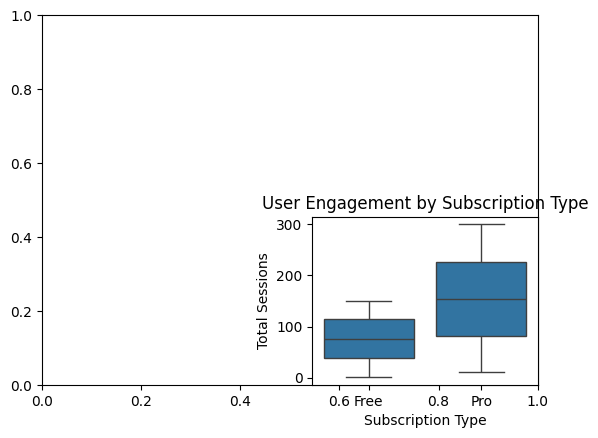

In [5]:
# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Chart 4: User Engagement by Subscription Type
plt.subplot(2, 2, 4)
sns.boxplot(x='subscription_type', y='total_sessions', data=df)
plt.title('User Engagement by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Total Sessions')


In [6]:

# Adjust layout and display
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>